<a href="https://colab.research.google.com/github/BifoldTide/-Core-Proyecto-2-Parte-I-/blob/develop/(Core)_Proyecto_2_%E2%80%93_Parte_I_EDA_3_(Vinos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descripción de los datos
Set de datos importado desde sklearn. tiene 178 filas.
Columnas:
- Alcohol                      
- Acido málico                  
- Ceniza                        
- Alcalinidad de la ceniza          
- Magnesio                    
- Phenoles totales               
- Flavoloides                  
- Phenoles no flavoloides       
- Proantocianinas             
- Intensidad de color             
- Tono                          
- od280/od315 de vinos diluídos
- Prolino                      
- Tipo  

### Carga de datos

In [2]:
# Importar bibliotecas y datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [10]:
# Cargar datos
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["type"] = wine.target

df_heatmap = df.copy()
tipos = wine.target_names
df["type"] = df["type"].apply(lambda x: tipos[0] if x == 0 else tipos[1] if x == 1 else tipos[2])

# Descarga del dataset
df.to_csv("Wine.csv")

# Muestra de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  type 

### Demostración por gráficos


                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.140430  0.243722   
malic_acid                    0.140430    1.000000  0.230674   
ash                           0.243722    0.230674  1.000000   
alcalinity_of_ash            -0.306598    0.304069  0.366374   
magnesium                     0.365503    0.080188  0.361488   
total_phenols                 0.310920   -0.280225  0.132193   
flavanoids                    0.294740   -0.325202  0.078796   
nonflavanoid_phenols         -0.162207    0.255236  0.145583   
proanthocyanins               0.192734   -0.244825  0.024384   
color_intensity               0.635425    0.290307  0.283047   
hue                          -0.024203   -0.560265 -0.050183   
od280/od315_of_diluted_wines  0.103050   -0.255185 -0.007500   
proline                       0.633580   -0.057466  0.253163   
type                         -0.354167    0.346913 -0.053988   

                              alcalinit

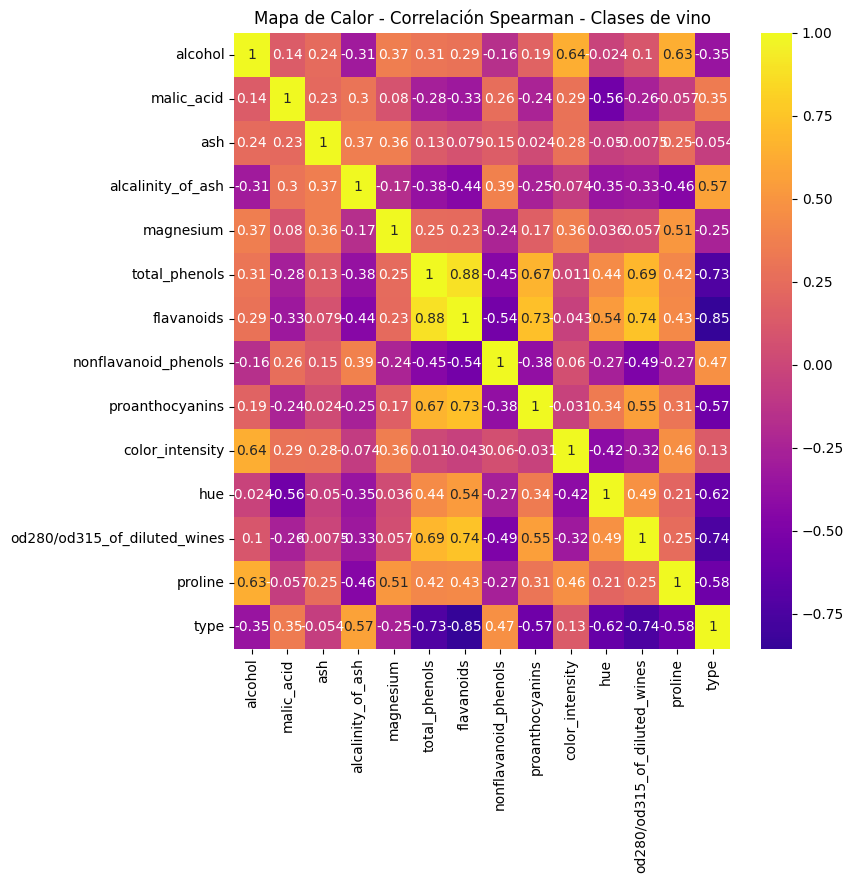

In [8]:
# Mapa de calor

# Generación correlativo con Spearman (es el que prefiero)
corr_spearman = df_heatmap.corr(method='spearman')
print(corr_spearman)
from os import name
# Generación mapa con correlativo
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_spearman, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor - Correlación Spearman - Clases de vino")
plt.show()

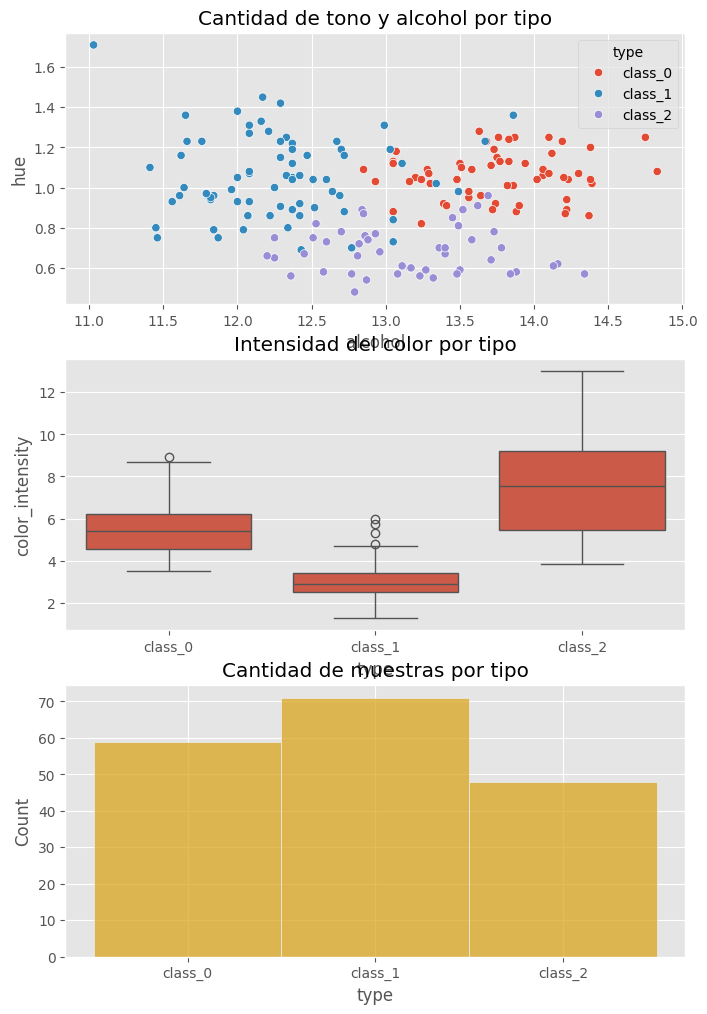

In [19]:
# Gráficos varios
fig = plt.figure(figsize = (8, 12))
plt.style.use('ggplot')

plt.subplot(3, 1, 1)
# Gráfico de alcohol por tipo de vino y tono
sns.scatterplot(data = df, x = "alcohol", y = "hue", hue = "type")
plt.title("Cantidad de tono y alcohol por tipo")

plt.subplot(3, 1, 2)
# Gráfico de dispersión por tono y cantidad de alcohol
sns.boxplot(data = df, x = "type", y = "color_intensity")
plt.title("Intensidad del color por tipo")

plt.subplot(3, 1, 3)
# Histograma de especimenes por clase de alcohol
sns.histplot(data = df, x = "type", color = "goldenrod")
plt.title("Cantidad de muestras por tipo")
plt.show()

### Resumen e interpretación

- Los vinos de clase 1 contienen menos intensidad de color y alcohol en general, y el tono es más pronunciado que los demás
- Los vinos de clase 2 tienen la mayor cantidad de intensidad de color y una cantidad de alcohol promedio mayor que los demás, pero la pronunciacion del tono es leve.
- Los vinos de clase 0 tienen una intensidad de color promedio, y en comparación con los demás, tiene más alcohol y tono pronunciado.
- Dentro del dataset, se encuentran más muestras del vino clase 1, y menos del vino clase 2